## Loading the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = 'AppleGothic'  
plt.rcParams['axes.unicode_minus'] = False    

In [3]:
d = {}

for data_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'liab', 'eq']:
    print(f"read csv {data_name} ...")
    d[data_name] = pd.read_csv(f"stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)
    print(f"done!  {d[data_name].shape}")

itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

read csv adj_close ...
done!  (2278, 582)
read csv mc ...
done!  (2278, 582)
read csv sales ...
done!  (2278, 582)
read csv op ...
done!  (2278, 582)
read csv ni ...
done!  (2278, 582)
read csv liab ...
done!  (2278, 582)
read csv eq ...
done!  (2278, 582)


## Data Information

* Data file: stock.{table_name}.csv
* Data time frame: 2018-06-01 ~ 2020-10-14 
* Number of stocks: 2,278
* The currency of the data is in Won (South Korea Currency)
* Explanation of each dataset
  * `stock.adj_close.csv`: the adjusted closing price for each stock.
  * `stock.mc.csv`: the market capitalization in millions of Won 
  * `stock.sales.csv`: the sales revenue in millions of Won 
  * `stock.op.csv`: the operating profit in millions of Won
  * `stock.ni.csv`: the net income in millions of Won 
  * `stock.liab.csv`: the liabilities in millions of Won
  * `stock.eq.csv`: the equity in millions of Won
  * `stock.itemname.csv`: the stock code and the item name
  * `stock.sector.csv`: the stock code and the sector

In [4]:
d['adj_close']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,3820.0,3900.0,4050.0,4070.0,4190.0,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12400.0,12800.0,12900.0,12800.0,12850.0,13050.0,13050.0,12900.0,12650.0,13350.0


In [5]:
d['mc']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,322608.0,328195.0,326798.0,325402.0,321212.0,321212.0,325402.0,335178.0,329591.0,319815.0,...,617300.0,614500.0,610300.0,673100.0,663400.0,656400.0,674500.0,670400.0,678700.0,666200.0
A000030,10478000.0,10782200.0,10849800.0,11154000.0,11221600.0,11255400.0,11390600.0,11154000.0,10883600.0,11052600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000040,88263.0,89101.0,89221.0,90538.0,89820.0,88023.0,87784.0,89460.0,89460.0,88981.0,...,70700.0,68100.0,70300.0,76000.0,74200.0,78800.0,79100.0,79100.0,77900.0,80100.0
A000050,361882.0,371477.0,372848.0,378331.0,378331.0,378331.0,374218.0,379701.0,397521.0,398892.0,...,294700.0,287900.0,289200.0,297500.0,298800.0,298800.0,301600.0,301600.0,297500.0,296100.0
A000060,2212277.0,2212277.0,2223311.0,2212277.0,2250895.0,2223311.0,2283997.0,2311581.0,2223311.0,2306064.0,...,1449400.0,1449400.0,1460800.0,1494900.0,1511900.0,1517600.0,1580200.0,1585800.0,1557400.0,1540400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,2350704.0,2216726.0,2213681.0,2356794.0,2448142.0,2390288.0,2332434.0,2335479.0,2375063.0,2291614.0,...,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0
A950170,484826.0,498829.0,505830.0,500579.0,495328.0,477825.0,491828.0,476075.0,474325.0,416566.0,...,133700.0,136500.0,141800.0,142500.0,146700.0,145600.0,151200.0,155600.0,155400.0,151700.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261200.0,269600.0,271700.0,269600.0,270600.0,274900.0,274900.0,271700.0,266400.0,281200.0


In [6]:
d['sales']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,...,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05
A000030,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,...,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06
A000040,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,...,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05
A000050,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,...,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05
A000060,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,...,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
d['op']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,1.174563e+04,...,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04,1.742382e+04
A000030,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,2.098295e+06,...,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06,2.928355e+06
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,4.085761e+04,...,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04,2.164980e+04
A000060,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,4.588379e+05,...,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05,4.269107e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
d['ni']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,...,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04
A000030,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,...,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,...,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04
A000060,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,...,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d['liab']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,8.201098e+04,...,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04,7.710188e+04
A000030,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,3.052559e+08,...,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08,3.078897e+08
A000040,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,6.651411e+04,...,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05,1.021730e+05
A000050,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,5.797969e+05,...,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05,7.113181e+05
A000060,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,1.666376e+07,...,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07,2.216355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
d['eq']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,2.986663e+05,...,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05,3.111886e+05
A000030,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,2.053998e+07,...,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07,2.191190e+07
A000040,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,4.116064e+04,...,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04,5.947566e+04
A000050,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,6.991548e+05,...,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05,7.369145e+05
A000060,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,1.577763e+06,...,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06,2.600143e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

stock_info = pd.concat([itemname, sector], axis=1)

stock_info
#The item name is in Korean, but I will translate the item names we use in the analysis into English.

,itemname,Sector
Symbol,,
A000020,동화약품,Health_Care
A000030,우리은행,NaN
A000040,KR모터스,Consumer_Discretionary
A000050,경방,Consumer_Discretionary
A000060,메리츠화재,Financials
...,...,...
A950160,코오롱티슈진,NaN
A950170,JTC,NaN
A950180,SNK,NaN


## Stock Data Analysis & EDA (Exploratory Data Analysis)

Let's pick one specific stock to explore the data deeper. We will choose `Samsung Electronics`. 

In [13]:
code = "A005930"
codename = stock_info.loc[code, 'itemname']
code, codename

('A005930', '삼성전자')

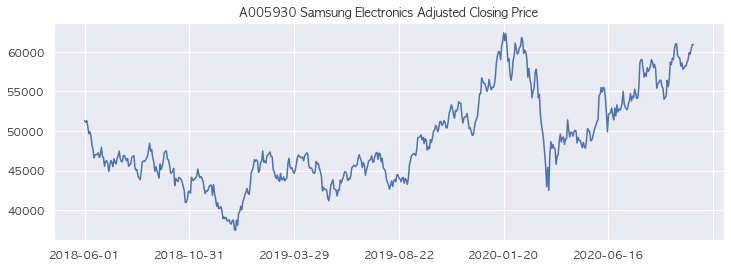

In [15]:
# The adjusted closing price for Samsung Electronics
d['adj_close'].loc[code, :].plot(figsize=(12,4), title=f'{code} Samsung Electronics Adjusted Closing Price');

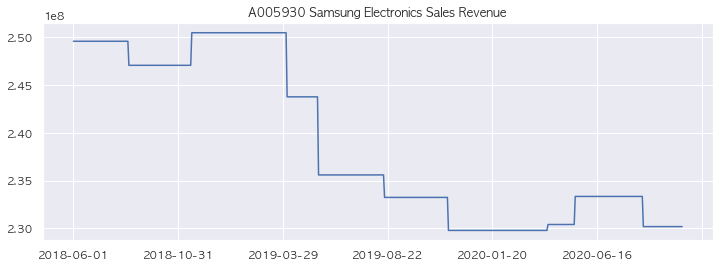

In [16]:
#The sales revenue for Samsung Electronics
d['sales'].loc[code, :].plot(figsize=(12,4), title=f'{code} Samsung Electronics Sales Revenue');

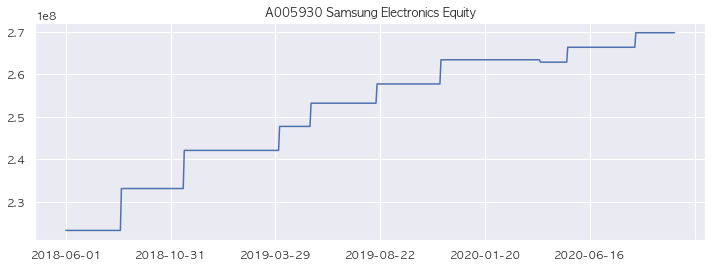

In [17]:
#The equity for Samsung Electronics
d['eq'].loc[code, :].plot(figsize=(12,4), title=f'{code} Samsung Electronics Equity');

### Drawing Moving Average Line for Samsung Electronics using .rolling() function

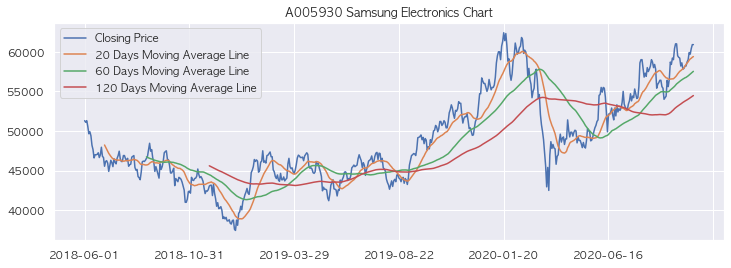

In [18]:
d['adj_close'].loc[code, :].plot(figsize=(12,4), label='Closing Price');
d['adj_close'].loc[code, :].rolling(20).mean().plot(label='20 Days Moving Average Line');
d['adj_close'].loc[code, :].rolling(60).mean().plot(label='60 Days Moving Average Line');
d['adj_close'].loc[code, :].rolling(120).mean().plot(label='120 Days Moving Average Line');

plt.title(f"{code} Samsung Electronics Chart")
plt.legend();

### Calculating the percentage of each sector in the entire stock market

In [19]:
# Picking the date 
view_date = '2020-10-14'

In [20]:
# The overall market capitalization on 10/14/2020
d['mc'].loc[:,view_date]

Symbol
A000020     666200.0
A000030          NaN
A000040      80100.0
A000050     296100.0
A000060    1540400.0
             ...    
A950160     489600.0
A950170     151700.0
A950180     281200.0
A950190     366100.0
A950200     267800.0
Name: 2020-10-14, Length: 2278, dtype: float64

In [21]:
# The sector information by item
stock_info.loc[:,'Sector']

Symbol
A000020               Health_Care
A000030                       NaN
A000040    Consumer_Discretionary
A000050    Consumer_Discretionary
A000060                Financials
                    ...          
A950160                       NaN
A950170                       NaN
A950180                       NaN
A950190                       NaN
A950200                       NaN
Name: Sector, Length: 2278, dtype: object

In [22]:
# concating two dataset (market capitalization & sector)
name_sector_mc_df = pd.concat([stock_info, d['mc'].loc[:,view_date]], axis=1)
name_sector_mc_df

,itemname,Sector,2020-10-14
Symbol,,,
A000020,동화약품,Health_Care,666200.0
A000030,우리은행,NaN,NaN
A000040,KR모터스,Consumer_Discretionary,80100.0
A000050,경방,Consumer_Discretionary,296100.0
A000060,메리츠화재,Financials,1540400.0
...,...,...,...
A950160,코오롱티슈진,NaN,489600.0
A950170,JTC,NaN,151700.0
A950180,SNK,NaN,281200.0


In [23]:
# Summing the market capitalization by sector using groupby()
sector_mc_df = name_sector_mc_df.groupby('Sector').sum().sort_values(view_date)
sector_mc_df

,2020-10-14
Sector,
Real_Estate,2209400.0
Utilities,19979400.0
Communication_Services,53689900.0
Energy,55118900.0
Consumer_Staples,97112100.0
Financials,119876000.0
Materials,153872500.0
Consumer_Discretionary,178724900.0
Industrials,199103300.0
